In [2]:
from tensorflow import keras
from keras.datasets import reuters

In [5]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [20]:
import pandas as pd

pd.DataFrame(zip(train_data, train_labels))

,0,1
0,"[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ...",3
1,"[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,...",4
2,"[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,...",3
3,"[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46...",4
4,"[1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2...",4
...,...,...
8977,"[1, 313, 262, 2529, 1426, 8, 130, 40, 129, 363...",19
8978,"[1, 4, 96, 5, 340, 3976, 23, 328, 6, 154, 7, 4...",19
8979,"[1, 141, 3890, 387, 81, 8, 16, 1629, 10, 340, ...",25
8980,"[1, 53, 46, 957, 26, 14, 74, 132, 26, 39, 46, ...",3


In [42]:
import numpy as np
 
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
 
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Vectorize labels
y_train = vectorize_sequences(train_labels, dimension=max(train_labels.tolist() + test_labels.tolist()) + 1)
y_test = vectorize_sequences(test_labels)

In [87]:
from keras import models
from keras import layers
 
network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(46, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [88]:
training_samples = 7500
validation_samples = x_train.shape[0] - training_samples

x_validation = x_train[training_samples:]
y_validation = y_train[training_samples:]

x_training = x_train[:training_samples]
y_training = y_train[:training_samples]

history = network.fit(x=x_training, y=y_training, batch_size=512, epochs=20, validation_data=(x_validation, y_validation))

Train on 7500 samples, validate on 1482 samples
Epoch 1/20
7500/7500 [==============================] - 1s 108us/step - loss: 2.7736 - accuracy: 0.4808 - val_loss: 1.8883 - val_accuracy: 0.6350
Epoch 2/20
7500/7500 [==============================] - 1s 96us/step - loss: 1.5088 - accuracy: 0.6869 - val_loss: 1.3717 - val_accuracy: 0.7018
Epoch 3/20
7500/7500 [==============================] - 1s 91us/step - loss: 1.0786 - accuracy: 0.7693 - val_loss: 1.1690 - val_accuracy: 0.7476
Epoch 4/20
7500/7500 [==============================] - 1s 89us/step - loss: 0.8327 - accuracy: 0.8301 - val_loss: 1.0690 - val_accuracy: 0.7652
Epoch 5/20
7500/7500 [==============================] - 1s 98us/step - loss: 0.6657 - accuracy: 0.8652 - val_loss: 1.0006 - val_accuracy: 0.7868
Epoch 6/20
7500/7500 [==============================] - 1s 90us/step - loss: 0.5307 - accuracy: 0.8925 - val_loss: 0.9664 - val_accuracy: 0.7976
Epoch 7/20
7500/7500 [==============================] - 1s 90us/step - loss: 0.42

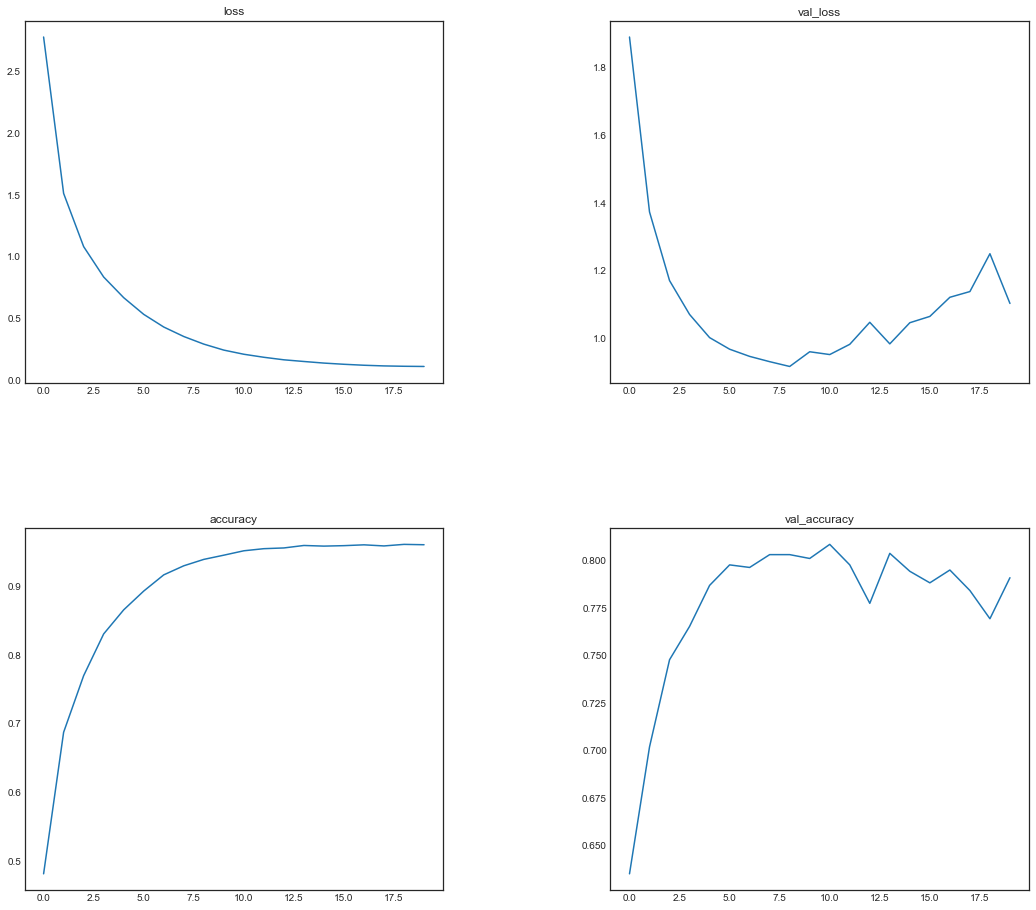

In [89]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

fig = plt.figure(figsize=(18, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2, 2, 1)
plt.title('loss')
plt.plot(history_dict['loss'])
plt.subplot(2, 2, 2)
plt.title('val_loss')
plt.plot(history_dict['val_loss'])
plt.subplot(2, 2, 3)
plt.title('accuracy')
plt.plot(history_dict['accuracy'])
plt.subplot(2, 2, 4)
plt.title('val_accuracy')
plt.plot(history_dict['val_accuracy'])

plt.show()

In [ ]:
# 1. After 8. epoch accuracy do not grows up anymore

In [ ]:
training_samples = 8000
validation_samples = x_train.shape[0] - training_samples

x_validation = x_train[training_samples:]
y_validation = y_train[training_samples:]

x_training = x_train[:training_samples]
y_training = y_train[:training_samples]

history = network.fit(x=x_training, y=y_training, batch_size=512, epochs=8, validation_data=(x_validation, y_validation))

Train on 8000 samples, validate on 982 samples
Epoch 1/8
5120/8000 [==================>...........] - ETA: 0s - loss: 0.1538 - accuracy: 0.9521

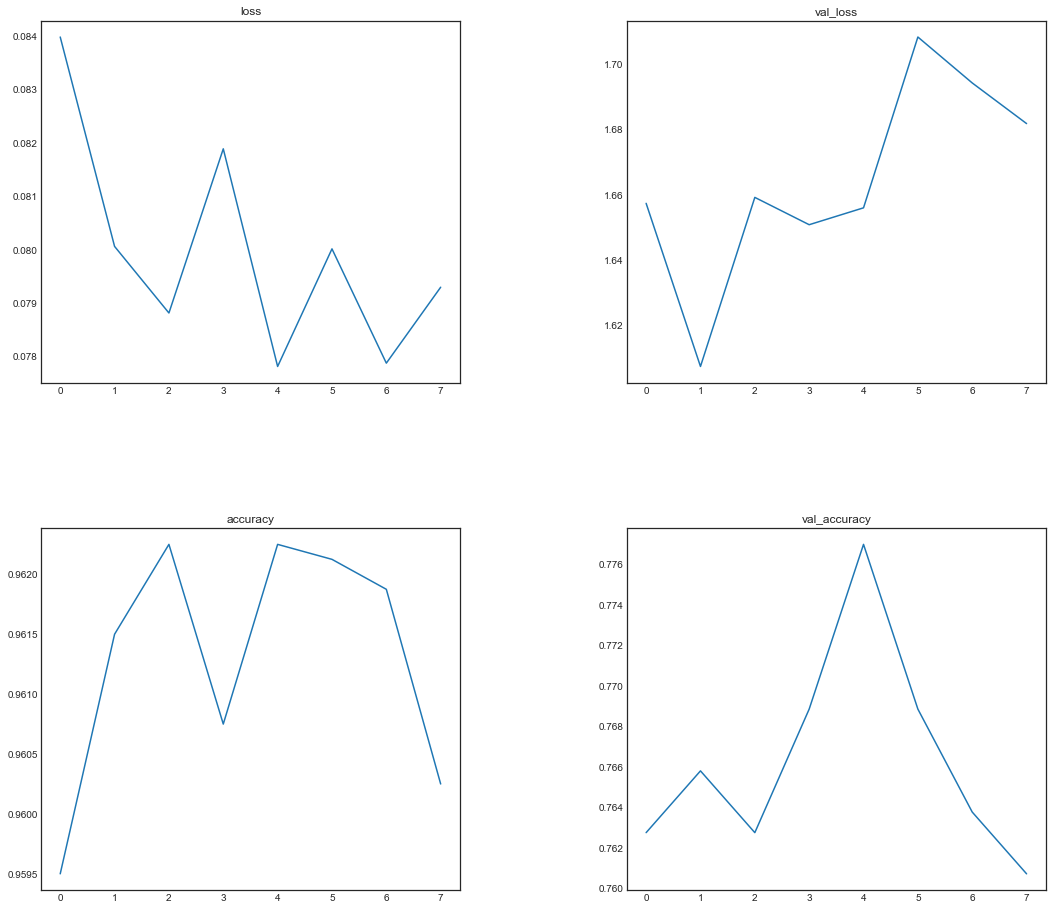

In [83]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

fig = plt.figure(figsize=(18, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2, 2, 1)
plt.title('loss')
plt.plot(history_dict['loss'])
plt.subplot(2, 2, 2)
plt.title('val_loss')
plt.plot(history_dict['val_loss'])
plt.subplot(2, 2, 3)
plt.title('accuracy')
plt.plot(history_dict['accuracy'])
plt.subplot(2, 2, 4)
plt.title('val_accuracy')
plt.plot(history_dict['val_accuracy'])

plt.show()

In [84]:
# 2. Accuracy of training and validation sets barely changes. Seems like network is not learning at all

Train on 8000 samples, validate on 982 samples
Epoch 1/8
8000/8000 [==============================] - 1s 75us/step - loss: 3.2637 - accuracy: 0.3421 - val_loss: 2.8526 - val_accuracy: 0.4695
Epoch 2/8
8000/8000 [==============================] - 1s 74us/step - loss: 2.5016 - accuracy: 0.5222 - val_loss: 2.3929 - val_accuracy: 0.5601
Epoch 3/8
8000/8000 [==============================] - 1s 73us/step - loss: 2.1060 - accuracy: 0.5729 - val_loss: 2.1474 - val_accuracy: 0.5397
Epoch 4/8
8000/8000 [==============================] - 1s 66us/step - loss: 1.8653 - accuracy: 0.5826 - val_loss: 1.9841 - val_accuracy: 0.5631
Epoch 5/8
8000/8000 [==============================] - 1s 66us/step - loss: 1.6818 - accuracy: 0.6037 - val_loss: 1.8448 - val_accuracy: 0.5896
Epoch 6/8
8000/8000 [==============================] - 1s 67us/step - loss: 1.5409 - accuracy: 0.6119 - val_loss: 1.7629 - val_accuracy: 0.5937
Epoch 7/8
8000/8000 [==============================] - 1s 65us/step - loss: 1.4301 - accu

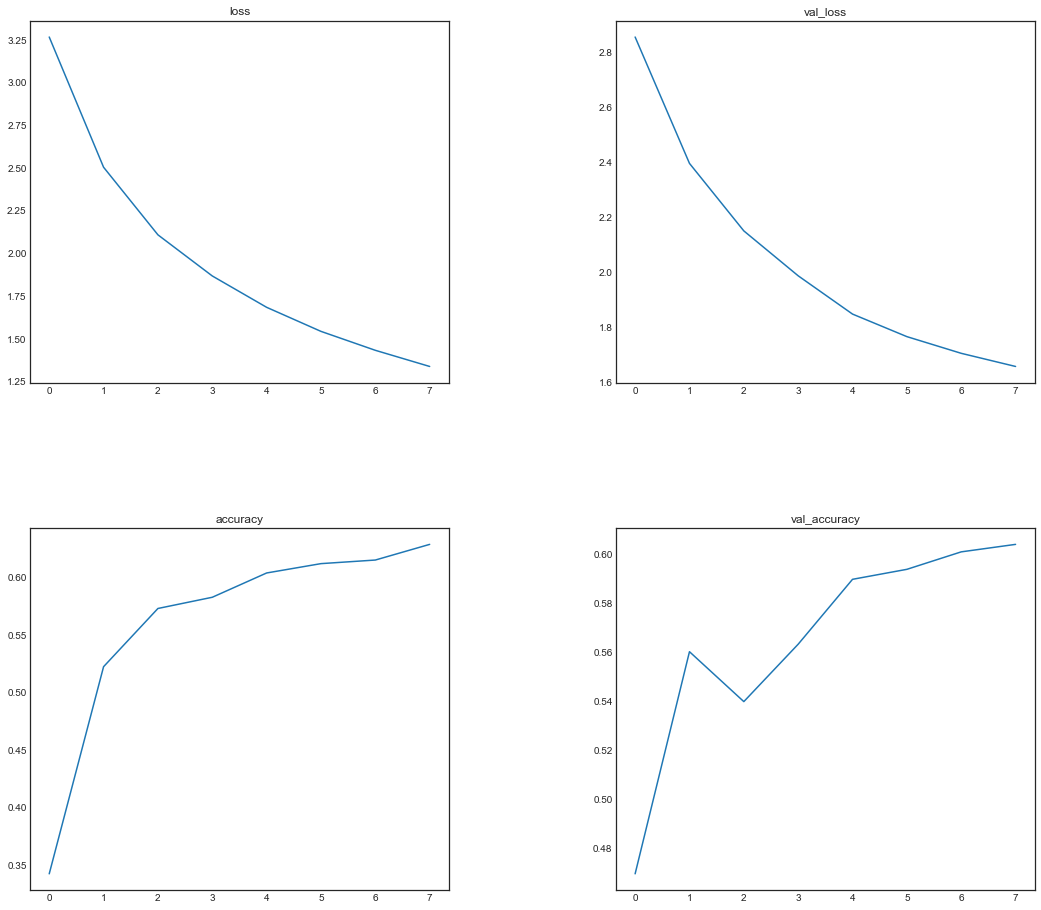

In [86]:
from keras import models
from keras import layers
 
network1 = models.Sequential()
network1.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
network1.add(layers.Dense(4, activation='relu'))
network1.add(layers.Dense(46, activation='softmax'))

network1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

training_samples = 8000
validation_samples = x_train.shape[0] - training_samples

x_validation = x_train[training_samples:]
y_validation = y_train[training_samples:]

x_training = x_train[:training_samples]
y_training = y_train[:training_samples]

history = network1.fit(x=x_training, y=y_training, batch_size=512, epochs=8, validation_data=(x_validation, y_validation))

history_dict = history.history
history_dict.keys()

fig = plt.figure(figsize=(18, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2, 2, 1)
plt.title('loss')
plt.plot(history_dict['loss'])
plt.subplot(2, 2, 2)
plt.title('val_loss')
plt.plot(history_dict['val_loss'])
plt.subplot(2, 2, 3)
plt.title('accuracy')
plt.plot(history_dict['accuracy'])
plt.subplot(2, 2, 4)
plt.title('val_accuracy')
plt.plot(history_dict['val_accuracy'])

plt.show()

In [ ]:
# 3. Eventually, accuracy is lower and loss is higher, however the network is learning rapidly. I guess, that 20 epochs is too little to learn the previous network